In [13]:
%pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [15]:
df = pd.read_csv('insurance.csv')

In [16]:
#exploaratory data analysis
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [17]:
df.shape

(1338, 7)

In [18]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [19]:
region_dummies = pd.get_dummies(df['region'], drop_first=True)
region_dummies.head()

,northwest,southeast,southwest
0,False,False,True
1,False,True,False
2,False,True,False
3,True,False,False
4,True,False,False


In [20]:
df = pd.concat([df, region_dummies], axis=1)

In [21]:
df.drop(['region'],axis=1, inplace=True)

In [22]:
df.head()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,female,27.900,0,yes,16884.92400,False,False,True
1,18,male,33.770,1,no,1725.55230,False,True,False
2,28,male,33.000,3,no,4449.46200,False,True,False
3,33,male,22.705,0,no,21984.47061,True,False,False
4,32,male,28.880,0,no,3866.85520,True,False,False


In [23]:
df.isnull().sum()

age          0
sex          0
bmi          0
children     0
smoker       0
charges      0
northwest    0
southeast    0
southwest    0
dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   int64  
 1   sex        1338 non-null   object 
 2   bmi        1338 non-null   float64
 3   children   1338 non-null   int64  
 4   smoker     1338 non-null   object 
 5   charges    1338 non-null   float64
 6   northwest  1338 non-null   bool   
 7   southeast  1338 non-null   bool   
 8   southwest  1338 non-null   bool   
dtypes: bool(3), float64(2), int64(2), object(2)
memory usage: 66.8+ KB


In [25]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

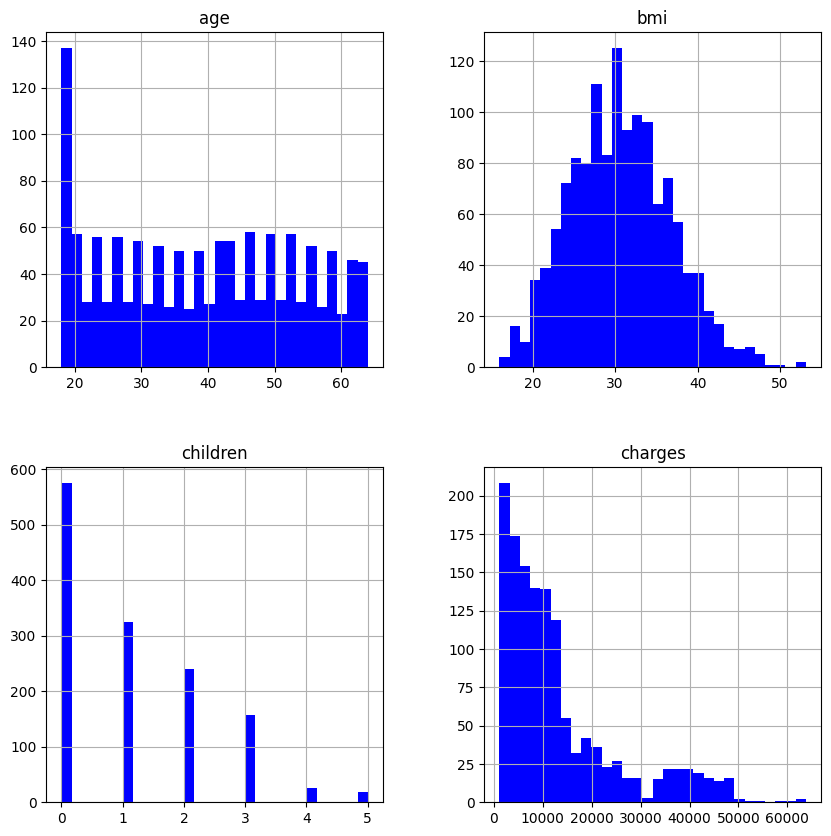

In [26]:
# Data Visualization
df[['age', 'sex', 'bmi', 'children', 'smoker', 'charges']].hist(bins=30, figsize=(10,10),color='blue')

Check the realtionship between the age and Charges, we can see the it is more complex than a linear relationship.

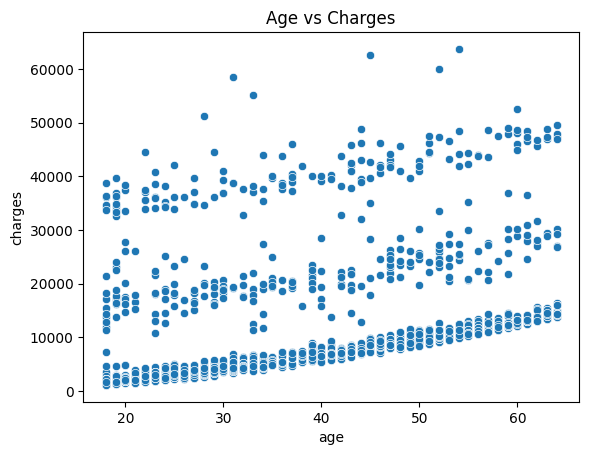

In [27]:
sns.scatterplot(x='age', y='charges', data=df)
plt.title('Age vs Charges')
plt.show()

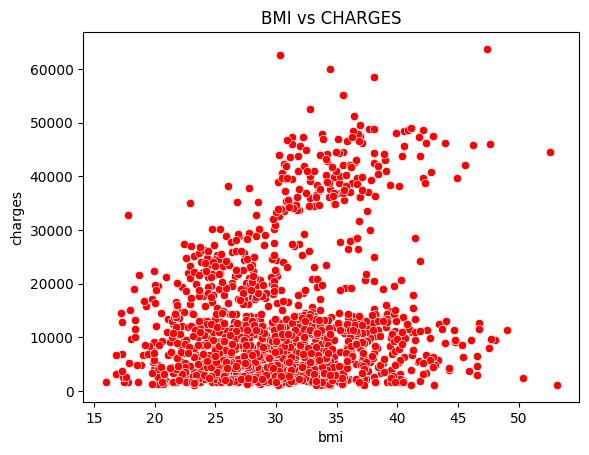

In [28]:
sns.scatterplot(x='bmi', y='charges', data=df,color='r')
plt.title('BMI vs CHARGES')
plt.show()

In [29]:
from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(df.sex.drop_duplicates())
df.sex = le.transform(df.sex)
#smoker or not
le.fit(df.smoker.drop_duplicates())
df.smoker = le.transform(df.smoker)
#region
# le.fit(df.region.drop_duplicates())
# df.region = le.tranaform(df.region)

In [30]:
df.head()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,False,False,True
1,18,1,33.770,1,0,1725.55230,False,True,False
2,28,1,33.000,3,0,4449.46200,False,True,False
3,33,1,22.705,0,0,21984.47061,True,False,False
4,32,1,28.880,0,0,3866.85520,True,False,False


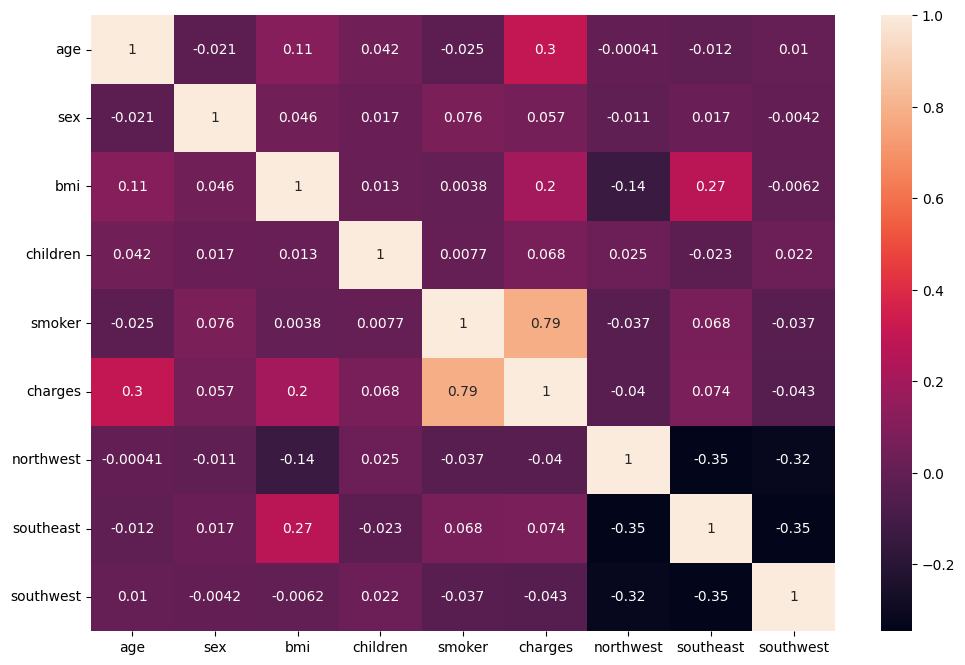

In [31]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

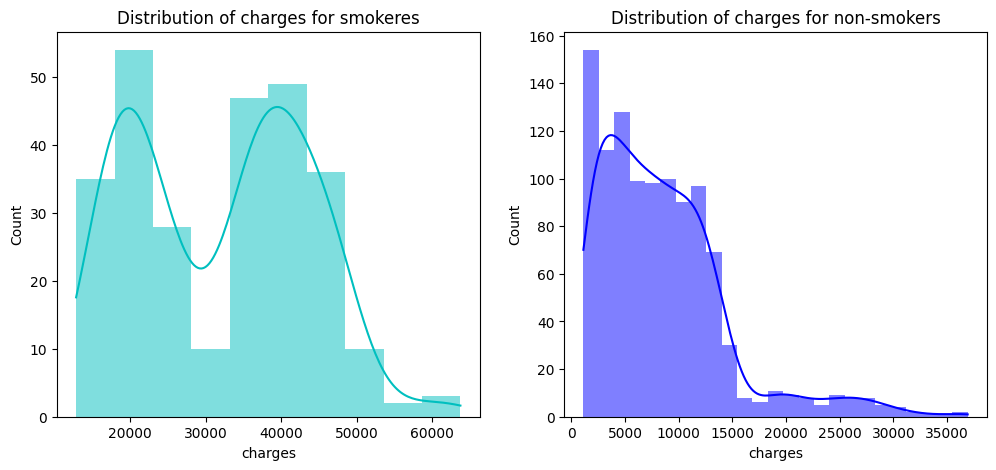

In [32]:
#Distrubtion of charges between smokers and non-smokers
f = plt.figure(figsize=(12,5))

ax = f.add_subplot(121)
sns.histplot(df[(df.smoker==1)]['charges'], color='c',ax=ax,kde=True, linewidth=0)
ax.set_title('Distribution of charges for smokeres')

ax = f.add_subplot(122)
sns.histplot(df[(df.smoker==0)]['charges'],color='b',ax=ax,kde=True,linewidth=0)
ax.set_title('Distribution of charges for non-smokers')

<Figure size 800x800 with 0 Axes>

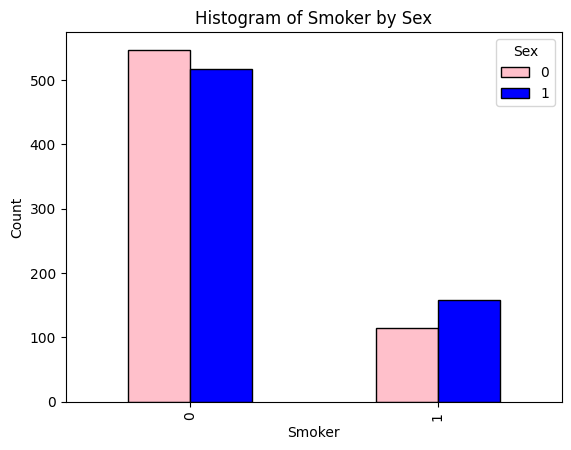

In [33]:
#Smoking patients spend more on treatment. But there is a feeling that the number of non-smoking patients is greater.
plt.figure(figsize=(8, 8))
smoker_sex_counts = df.groupby(['smoker', 'sex']).size().unstack()
smoker_sex_counts.plot(kind='bar', stacked=False, color=['pink', 'b'],edgecolor='black')
plt.title('Histogram of Smoker by Sex')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.legend(title='Sex')
plt.show()

Please note that women are coded with the symbol " 1 "and men "0". Thus non-smoking people and the truth more. Also we can notice that more male smokers than women smokers. It can be assumed that the total cost of treatment in men will be more than in women, given the impact of smoking. Maybe we'll check it out later. And some more useful visualizations.

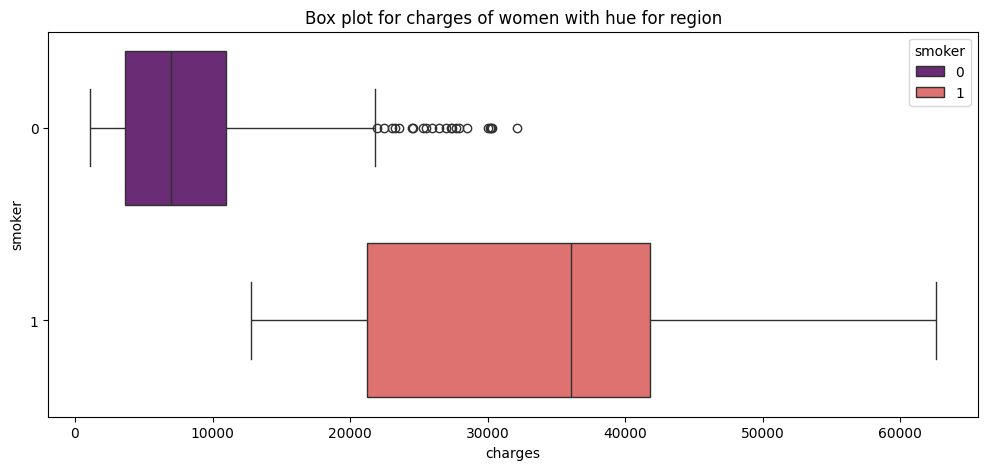

In [34]:
# Sex wise charges
plt.figure(figsize=(12, 5))
plt.title("Box plot for charges of women with hue for region")
sns.boxplot(
    y='smoker',
    x='charges',
    data=df[(df.sex == 1)],
    orient='h',
    hue='smoker',  # Replace 'region' with the column name you want for the hue
    palette='magma'
)
plt.show()

<Axes: title={'center': 'Box plot for charges of men'}, xlabel='charges', ylabel='smoker'>

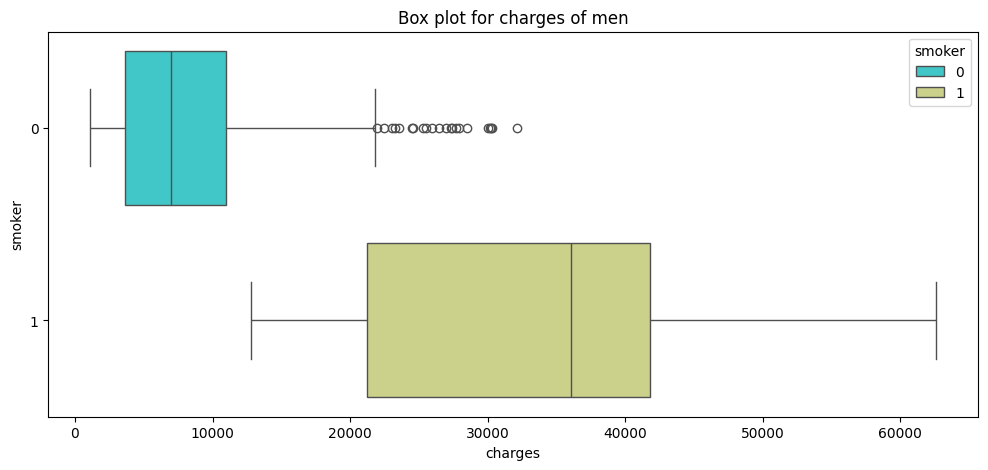

In [35]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of men")
sns.boxplot(y='smoker',x='charges',data=df[(df.sex == 1)] , orient='h',hue='smoker',palette='rainbow')

Now let's pay attention to the age of the patients. First, let's look at how age affects the cost of treatment, and also look at patients of what age more in our data set.

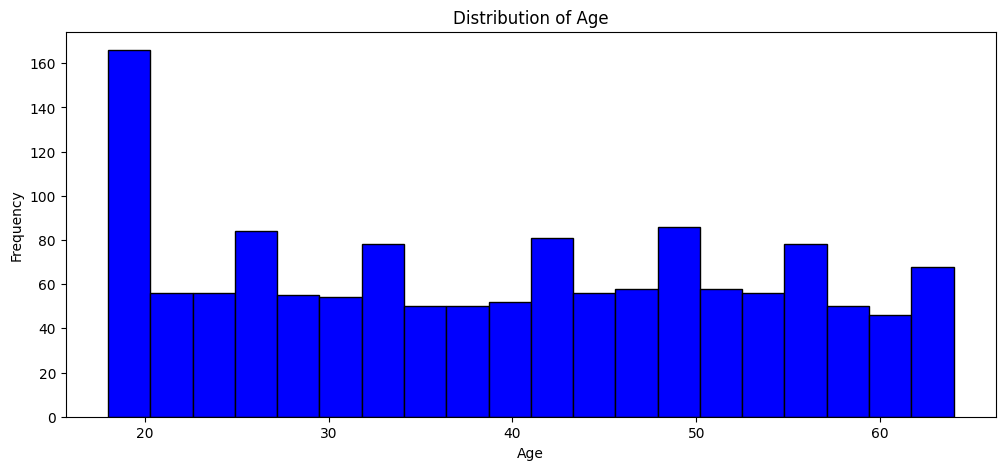

In [36]:
plt.figure(figsize=(12, 5))
plt.title("Distribution of Age")
plt.hist(df['age'], color='b', bins=20, edgecolor='black')  # Adjust bins as needed
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Young age charges

Let's check whether there are smokers among pateints 18 years.

Text(0.5, 1.0, 'The number of smokers and non-smokers (18 years old)')

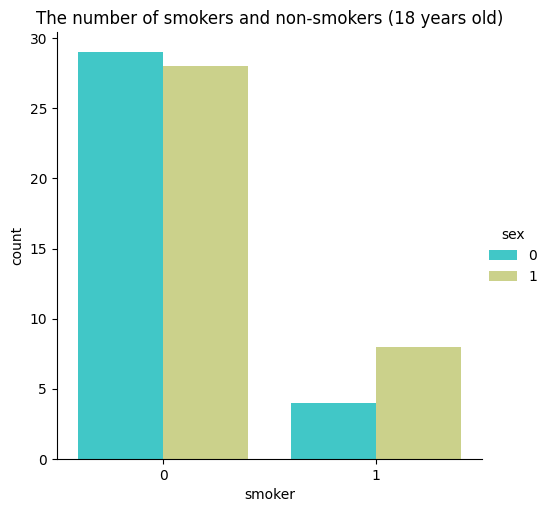

In [37]:
sns.catplot(x='smoker', kind='count', hue='sex', palette='rainbow',data=df[(df.age == 18)])
plt.title("The number of smokers and non-smokers (18 years old)")

For 18 years old, let's check the treatment cost of this age.

<Axes: title={'center': 'Box plot for charges 18 years old smokers'}, xlabel='charges', ylabel='smoker'>

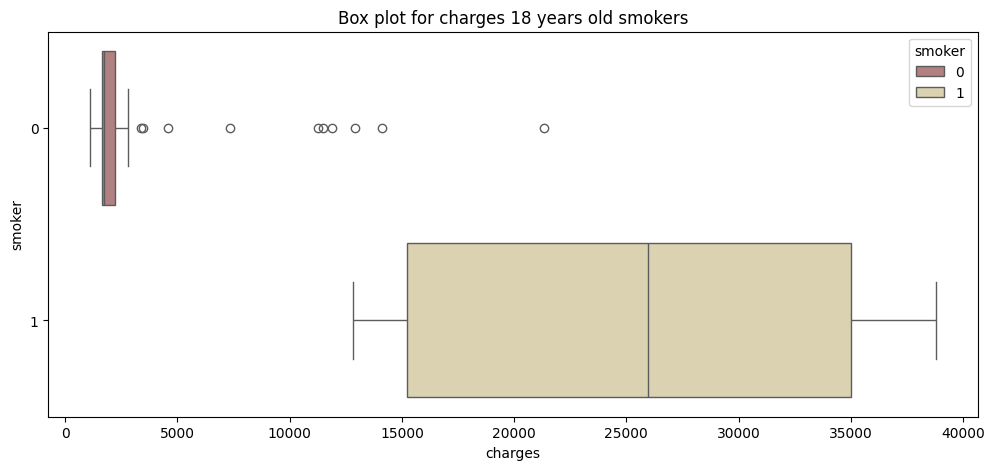

In [38]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges 18 years old smokers")
sns.boxplot(y='smoker', x='charges', data=df[(df.age ==18)],orient='h',hue='smoker',palette='pink')

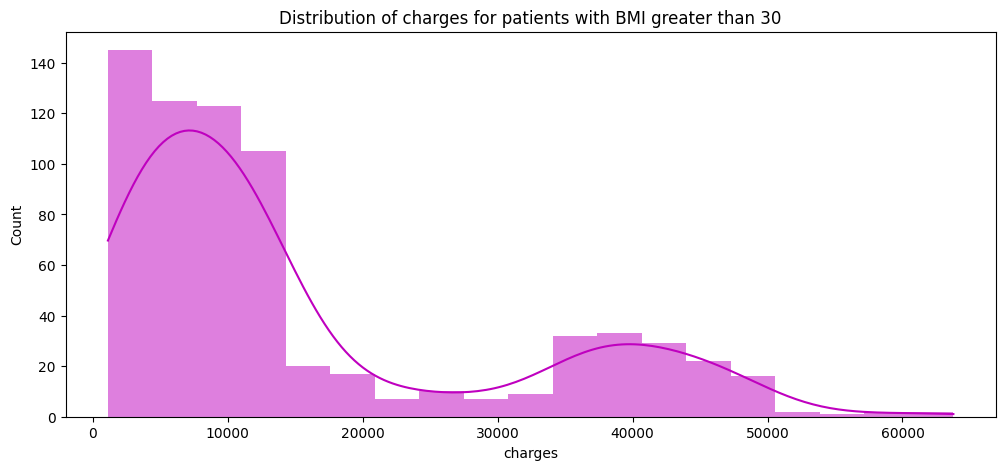

In [39]:
#Now let's check about BMI
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI greater than 30")
ax = sns.histplot(df[(df.bmi >= 30)]['charges'], color = 'm', kde=True,linewidth=0)

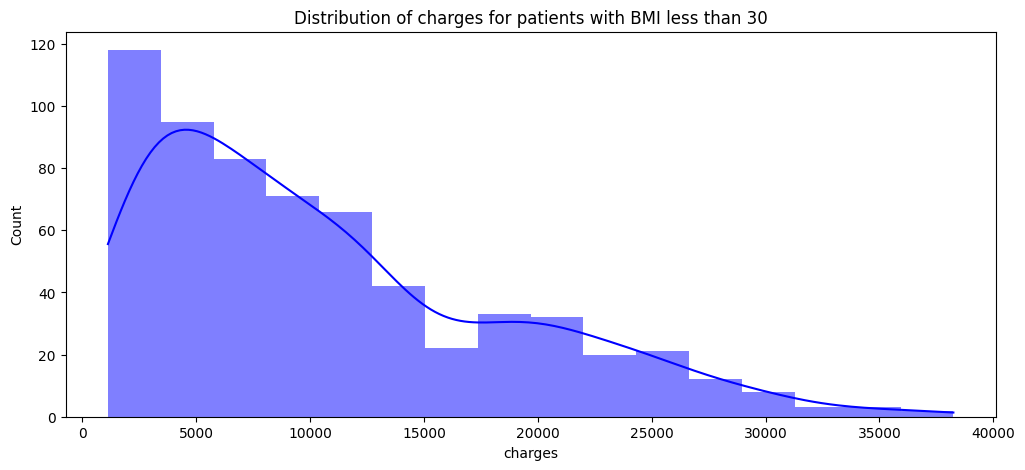

In [40]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI less than 30")
ax = sns.histplot(df[(df.bmi<30)]['charges'], color='b', kde=True,linewidth=0)

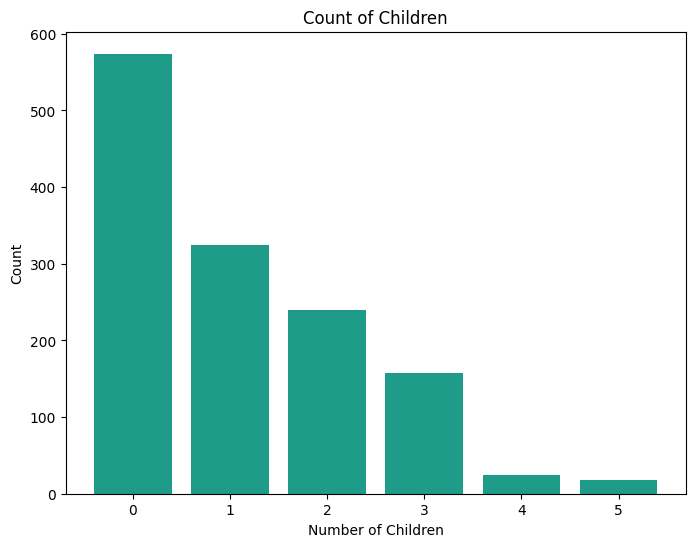

In [41]:
plt.figure(figsize=(8, 6))
# Count the occurrences of each unique value in the 'children' column
children_counts = df['children'].value_counts().sort_index()

plt.bar(children_counts.index, children_counts.values, color=plt.cm.viridis(0.55))
plt.title("Count of Children")
plt.xlabel("Number of Children")
plt.ylabel("Count")
plt.show()

In [42]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [43]:
# Splitting the data into training and testing 
#Charges is out target
X = df.drop(['charges'],axis=1)
y = df.charges

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)

(1070, 8)
(268, 8)


In [44]:
# Creating function for model fitting and sccuracy
def model_pred(model):
    model.fit(X_train, y_train)
    print(model.score(X_test, y_test))

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#Random Forest Regressor
rfr = RandomForestRegressor()
param_grid = {
    'n_estimators': [100,200],
    'max_depth': [4,5,6,7,8],
    "max_features": ["auto", "sqrt", "log2"],
    'random_state': [0,1,42]
}

In [46]:
# RandomizedSearchCV 
cv_random = RandomizedSearchCV(rfr, param_grid, cv=5)
cv_random.fit(X_train, y_train)

c:\Users\deeks\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\deeks\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\deeks\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c:\Us

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [4, 5, 6, 7, 8],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [100, 200],
                                        'random_state': [0, 1, 42]})

In [47]:
# Best Combination of parameters
cv_random.best_params_

{'random_state': 0,
 'n_estimators': 200,
 'max_features': 'log2',
 'max_depth': 7}

In [48]:
rfReg = RandomForestRegressor(n_estimators=100, max_features='auto', max_depth=4,random_state=42)

In [49]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Initialize the DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor()

# Define hyperparameters for grid search
dt_params = {
    'max_depth': [4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [50]:
# GridSearchCV
# Initialize GridSearchCV
cv_dt_regressor = GridSearchCV(dt_regressor, dt_params, cv=5)
print(cv_dt_regressor)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [4, 6, 8, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})


In [51]:
# Fit the model to the training data
cv_dt_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [4, 6, 8, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [52]:
# Get the best parameters from the grid search
cv_dt_regressor.best_params_

{'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2}

In [53]:
# Initialize the DecisionTreeRegressor with the best parameters
dt_reg = DecisionTreeRegressor(max_depth=4, min_samples_leaf=1, min_samples_split=2)

In [54]:
print("Score of Linear Regression:\n")
model_pred(lr)

Score of Linear Regression:

0.7999876970680433


In [55]:
print("Score of Random Forest Regressor:\n")
model_pred(cv_dt_regressor )

Score of Random Forest Regressor:

0.891395354266565


In [56]:
print("Score of DecissionTree Regressor:\n")
model_pred(dt_reg )

Score of DecissionTree Regressor:

0.8802320313936407


In [57]:
# From above result we can say that Random Forest Regressor is better choice for this taskrfReg_train_pred = cv_dt_regressor.predict(X_train)
# Evaluate Model with Random Forest Regressor
rfReg_train_pred = cv_dt_regressor.predict(X_train)
rfReg_test_pred = cv_dt_regressor.predict(X_test)

print("MSE train data: %.3f, MSE test data: %.3f"%(mean_squared_error(y_train, rfReg_train_pred),mean_squared_error(y_test, rfReg_test_pred)))
print("R2 train data: %.3f, R2 test data: %.3f"%(r2_score(y_train, rfReg_train_pred),r2_score(y_test, rfReg_test_pred)))

MSE train data: 20512484.898, MSE test data: 17282253.184
R2 train data: 0.857, R2 test data: 0.891


In [58]:
%pip install plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


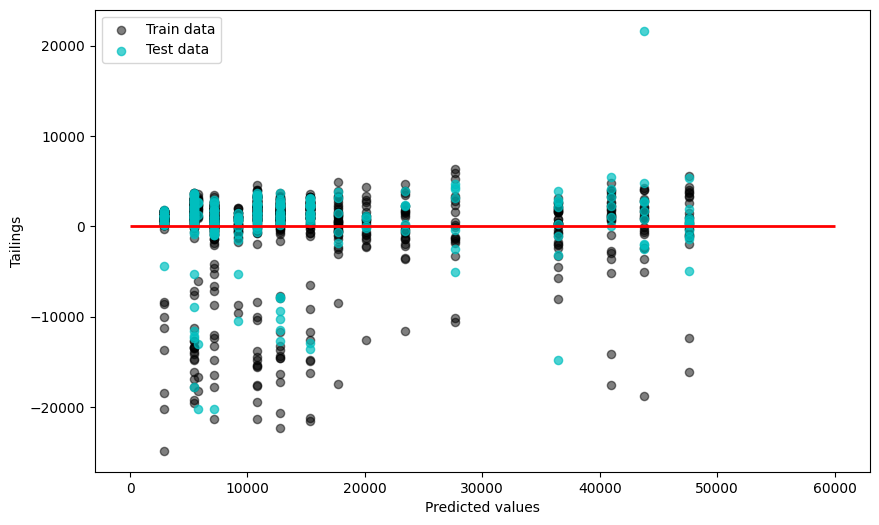

In [65]:
# Actual vs Predicted
plt.figure(figsize=(10,6))

plt.scatter(rfReg_train_pred, rfReg_train_pred - y_train,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(rfReg_test_pred,rfReg_test_pred - y_test,
          c = 'c', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Tailings')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
plt.show()

In [ ]:
#pridiction of medical cost per patients
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv('insurance.csv')

df = pd.get_dummies(df, drop_first=True)


X = df.drop('charges', axis=1)  
y = df['charges']                

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

for i, prediction in enumerate(predictions):
    print(f"Predicted medical cost for instance {i+1}: ${prediction:.2f}")


Predicted medical cost for instance 1: $9630.26
Predicted medical cost for instance 2: $5570.20
Predicted medical cost for instance 3: $28239.65
Predicted medical cost for instance 4: $12462.68
Predicted medical cost for instance 5: $34640.86
Predicted medical cost for instance 6: $8236.02
Predicted medical cost for instance 7: $2099.05
Predicted medical cost for instance 8: $14566.86
Predicted medical cost for instance 9: $5626.39
Predicted medical cost for instance 10: $10792.00
Predicted medical cost for instance 11: $19481.06
Predicted medical cost for instance 12: $7163.12
Predicted medical cost for instance 13: $4889.13
Predicted medical cost for instance 14: $46115.82
Predicted medical cost for instance 15: $48309.17
Predicted medical cost for instance 16: $45443.13
Predicted medical cost for instance 17: $9877.66
Predicted medical cost for instance 18: $43569.17
Predicted medical cost for instance 19: $8988.16
Predicted medical cost for instance 20: $24485.81
Predicted medical 